In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [12]:
combined_data = pd.DataFrame()

for root, dirs, files in os.walk('data'):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            combined_data = pd.concat([combined_data, df])

combined_data.reset_index(drop=True, inplace=True)

In [13]:
combined_data.to_csv('combined_data.csv',index=False)

In [14]:
combined_data.head()

,S.N.,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency Name,Constituency code,Won
0,1.0,KIREN RIJIJU,Bharatiya Janata Party,196415,9002,205417,51.38,Arunachal Pradesh,Arunachal West,1.0,NaN
1,2.0,NABAM TUKI,Indian National Congress,100100,4579,104679,26.18,Arunachal Pradesh,Arunachal West,1.0,NaN
2,3.0,TECHI RANA,Independent,31106,2208,33314,8.33,Arunachal Pradesh,Arunachal West,1.0,NaN
3,4.0,TOKO SHEETAL,Gana Suraksha Party,27670,2860,30530,7.64,Arunachal Pradesh,Arunachal West,1.0,NaN
4,5.0,BIMPAK SIGA,Independent,10569,949,11518,2.88,Arunachal Pradesh,Arunachal West,1.0,NaN


In [15]:
df= combined_data.drop(columns=['S.N.'])

In [10]:
df.head()

,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency Name,Constituency code,Won
0,KIREN RIJIJU,Bharatiya Janata Party,196415,9002,205417,51.38,Arunachal Pradesh,Arunachal West,1.0,NaN
1,NABAM TUKI,Indian National Congress,100100,4579,104679,26.18,Arunachal Pradesh,Arunachal West,1.0,NaN
2,TECHI RANA,Independent,31106,2208,33314,8.33,Arunachal Pradesh,Arunachal West,1.0,NaN
3,TOKO SHEETAL,Gana Suraksha Party,27670,2860,30530,7.64,Arunachal Pradesh,Arunachal West,1.0,NaN
4,BIMPAK SIGA,Independent,10569,949,11518,2.88,Arunachal Pradesh,Arunachal West,1.0,NaN


In [16]:
df.tail()

,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency Name,Constituency code,Won
8935,NaN,Aazad Samaj Party (Kanshi Ram) - ASPKR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8936,NaN,Apna Dal (Soneylal) - ADAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8937,NaN,AJSU Party - AJSUP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8938,NaN,All India Majlis-E-Ittehadul Muslimeen - AIMIM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8939,NaN,Independent - IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Candidate          8898 non-null   object 
 1   Party              8940 non-null   object 
 2   EVM Votes          8898 non-null   object 
 3   Postal Votes       8898 non-null   object 
 4   Total Votes        8898 non-null   object 
 5   % of Votes         8898 non-null   object 
 6   State              8898 non-null   object 
 7   Constituency Name  8898 non-null   object 
 8   Constituency code  8898 non-null   float64
 9   Won                42 non-null     float64
dtypes: float64(2), object(8)
memory usage: 698.6+ KB


In [18]:
df.replace("-", 0, inplace=True)

In [19]:
combined_data=df

In [20]:
combined_data.to_csv('combined_data.csv',index=False)   

### 1.Analyzing total votes by state

In [21]:
total_votes_by_state = df.groupby('State')['Total Votes'].sum()
total_votes_by_state = total_votes_by_state.sort_values(ascending=False)
total_votes_by_state

State
Uttar Pradesh                           87911642.0
West Bengal                             60483687.0
Maharashtra                             57179133.0
Tamil Nadu                              43674048.0
Bihar                                   43448949.0
Karnataka                               38793617.0
Madhya Pradesh                          37940251.0
Andhra Pradesh                          33729342.0
Rajasthan                               33164877.0
Gujarat                                 29115599.0
Odisha                                  25129026.0
Telangana                               22008373.0
Assam                                   20059870.0
Kerala                                  19980436.0
Jharkhand                               17241982.0
Chhattisgarh                            15061348.0
Punjab                                  13530923.0
Haryana                                 13055572.0
NCT OF Delhi                             8938049.0
Jammu and Kashmir        

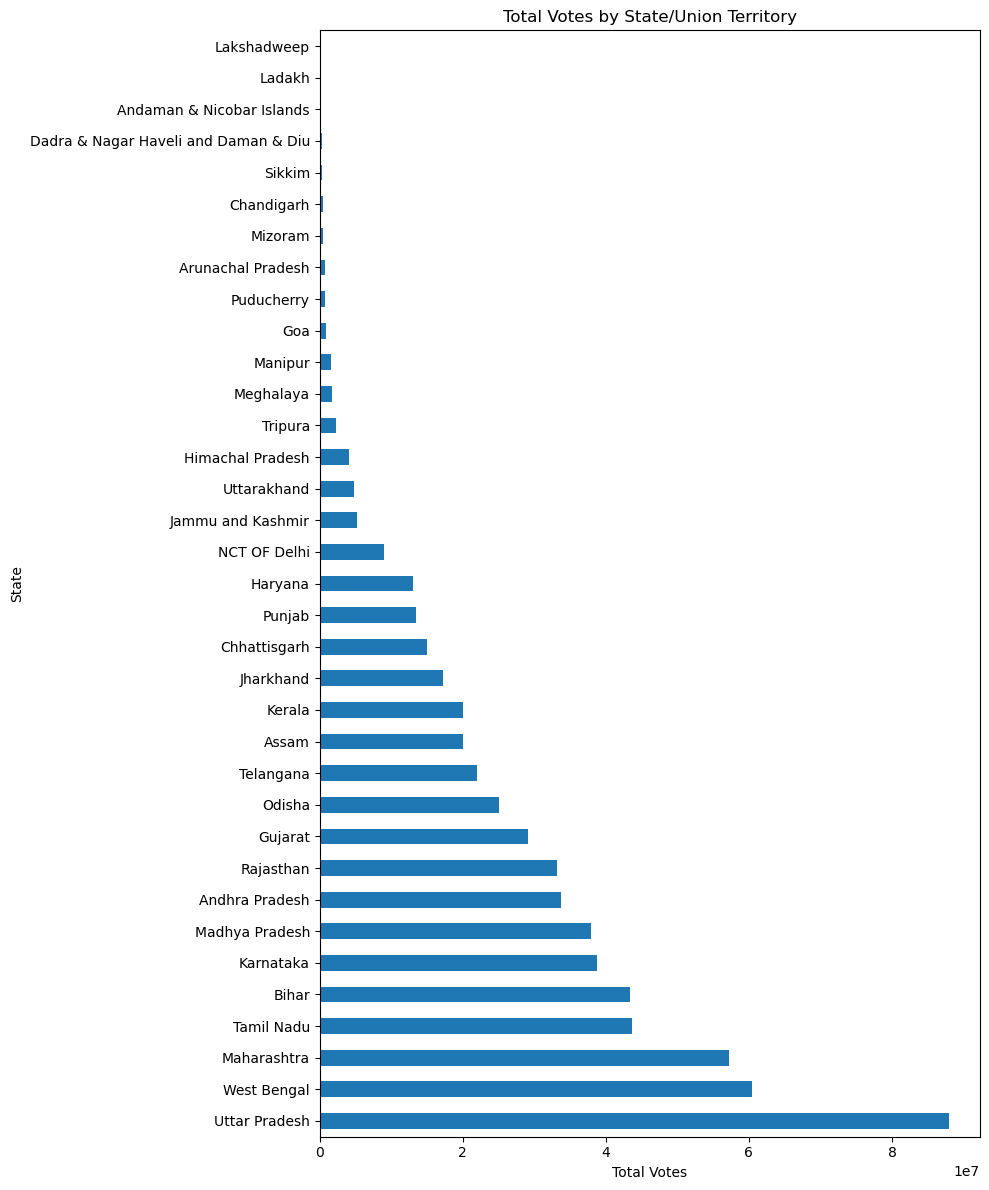

In [22]:
total_votes_by_state.plot(kind='barh', figsize=(10, 12))
plt.xlabel('Total Votes')
plt.ylabel('State')
plt.title('Total Votes by State/Union Territory')
plt.tight_layout()
plt.show()

### 2.This section contain all aspect of top parties and top candidates

In [23]:
total_candidates = df['Candidate'].count()
total_candidates_with_nota = df['Candidate'].count()-df['Candidate'].value_counts()['NOTA']
print(f'Total number of candidates: {total_candidates_with_nota}')
print(f'This contain all candidate as well as NOTA as a Individual candidate from each constituency.\n')

print(f'Total number of candidates including NOTA: {total_candidates}')
print(f'This contain all candidate as well as NOTA as a single candidate from overall country.')


Total number of candidates: 8357
This contain all candidate as well as NOTA as a Individual candidate from each constituency.

Total number of candidates including NOTA: 8898
This contain all candidate as well as NOTA as a single candidate from overall country.


In [46]:
total_parties = df['Party'].nunique()+df['Party'].value_counts()['Independent']-2
print(f'   Total number of parties: {total_parties}')
print(f'   This count includes Independent candidates as a party')

   Total number of parties: 4664
   This count includes Independent candidates as a party


### Total numbers of registered parties

In [47]:
total_reg_parties = df['Party'].nunique()-2
print(f'   Total number of registered parties: {total_reg_parties}')
print(f'   This count excludes Independent candidates')

   Total number of registered parties: 744
   This count excludes Independent candidates


### Top parties who provided most numbers of seat

In [76]:
excluded_parties = ['Independent', 'None of the Above']
filtered_parties = combined_data[~combined_data['Party'].isin(excluded_parties)]
top_5_parties = filtered_parties['Party'].value_counts().head(5)
print(top_5_parties)

Bahujan Samaj Party                            488
Bharatiya Janata Party                         441
Indian National Congress                       328
Socialist Unity Centre Of India (COMMUNIST)    150
Peoples Party of India (Democratic)             79
Name: Party, dtype: int64


### Top parties by voting percentage

In [183]:
party_votes = df.groupby('Party')['Total Votes'].sum().sort_values(ascending=False)

if 'Independent' in party_votes:
    party_votes = party_votes.drop('Independent')

top_parties = party_votes.head(5)

other_votes = df[~df['Party'].isin(top_parties.index)].groupby('Party')['Total Votes'].sum().sum()

top_parties = top_parties.append(pd.Series({'Other': other_votes}))

sns.set(style="whitegrid")

explode = (0.1, 0, 0, 0, 0, 0) 

# Plotting
fig, ax = plt.subplots()
ax.pie(top_parties, labels=top_parties.index, autopct='%1.1f%%', startangle=90, explode=explode)
ax.axis('equal')  

plt.title('Top Parties by Total Votes Share %')
plt.show()

KeyError: 'Column not found: Total Votes'

### Top candidate from each state

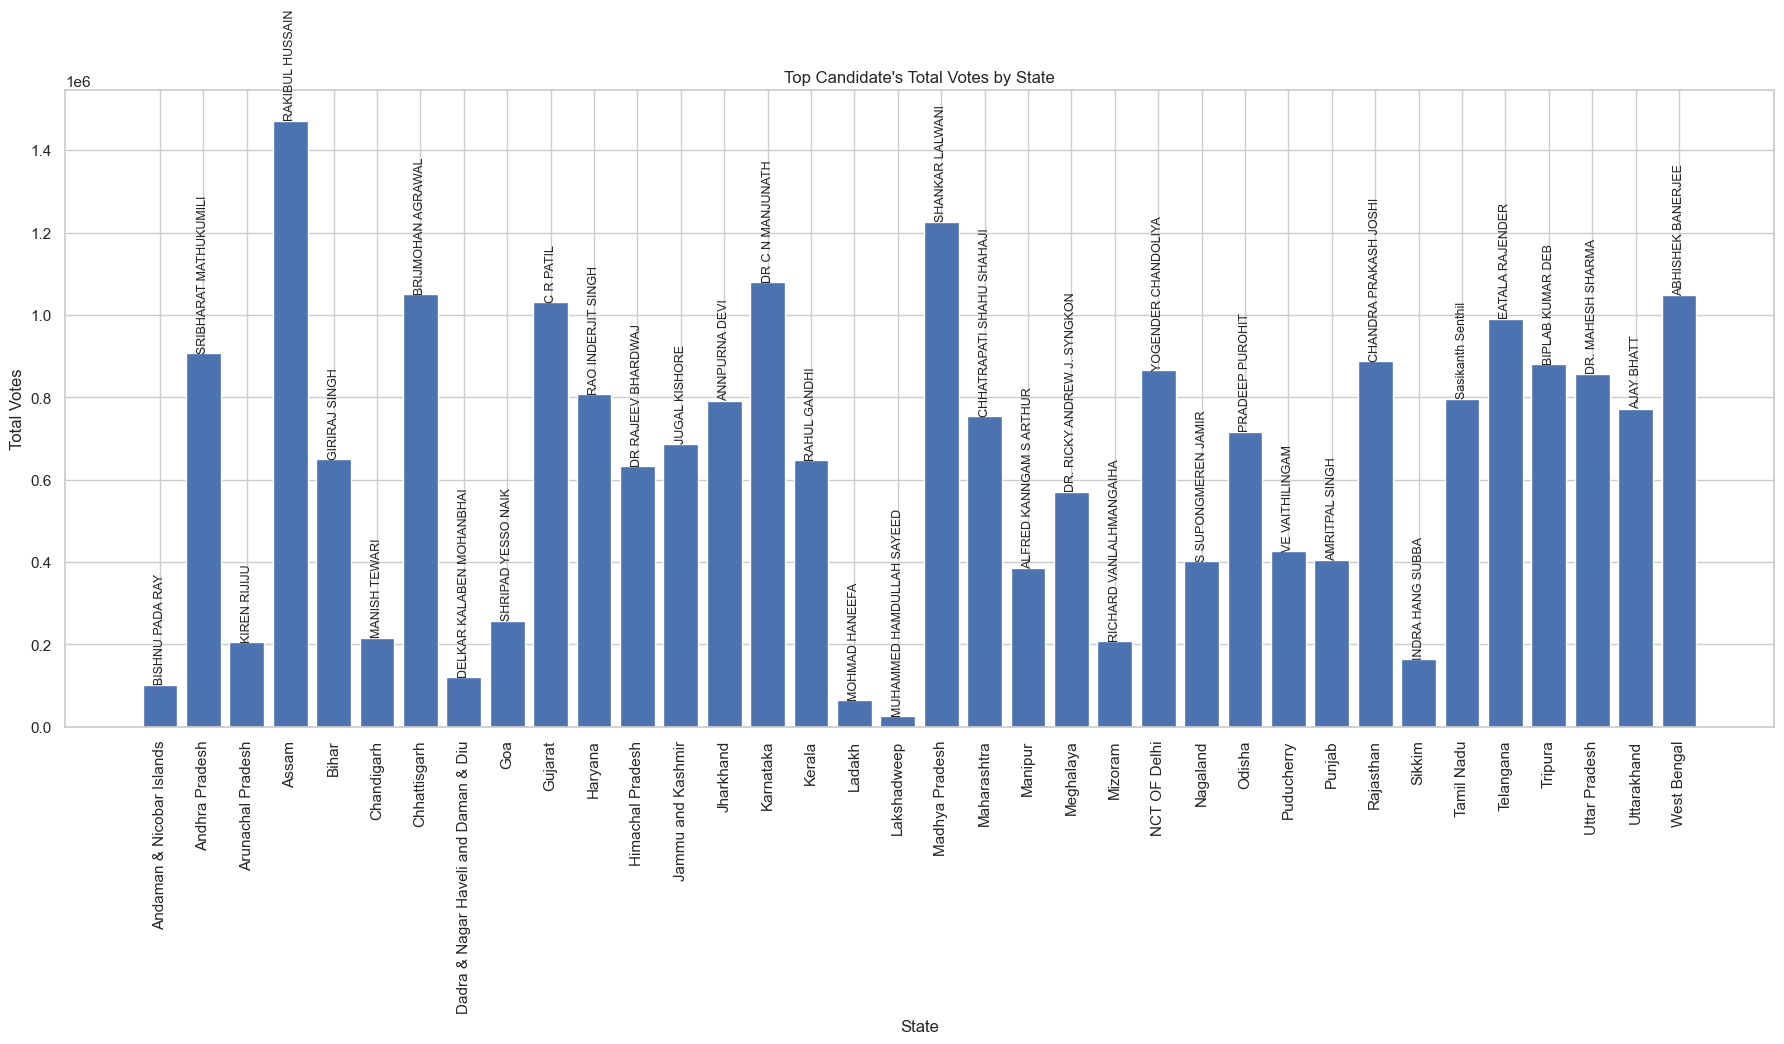

In [116]:

top_candidates_by_state = df.sort_values(['State', 'Total Votes'], ascending=[True, False]).groupby('State').head(3)

results = {}

for state in top_candidates_by_state['State'].unique():
    state_data = top_candidates_by_state[top_candidates_by_state['State'] == state]
    results[state] = state_data[['Candidate', 'Total Votes']].values.tolist()

top_candidates = top_candidates_by_state.groupby('State').first().reset_index()
plt.figure(figsize=(18, 10))
bars=plt.bar(top_candidates['State'], top_candidates['Total Votes'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Votes')
plt.title("Top Candidate's Total Votes by State")
plt.tight_layout()
for bar, candidate in zip(bars, top_candidates['Candidate']):
    yval = bar.get_height()
    plt.annotate(candidate, 
                 (bar.get_x() + bar.get_width() / 2, yval), 
                 ha='center', va='bottom', fontsize=9, rotation=90)

plt.show()

### constituencies and the candidate with highest winning margin

Top 10 Constituencies with Highest Winning Margins:
    Constituency Name                 Winner  \
156            Dhubri        RAKIBUL HUSSAIN   
220            INDORE        SHANKAR LALWANI   
523           VIDISHA  SHIVRAJ SINGH CHOUHAN   
382           Navsari              C R PATIL   
185       Gandhinagar              AMIT SHAH   
158   Diamond harbour      ABHISHEK BANERJEE   
511      Tripura West       BIPLAB KUMAR DEB   
527          Vadodara       DR. HEMANG JOSHI   
420            RAIPUR      BRIJMOHAN AGRAWAL   
501        TIRUVALLUR      Sasikanth Senthil   

                                     Runner-up  Winning Margin           State  
156                   MOHAMMED BADRUDDIN AJMAL         1012476           Assam  
220                                       NOTA         1008077  Madhya Pradesh  
523                         PRATAPBHANU SHARMA          821408  Madhya Pradesh  
382             NAISHADHBHAI BHUPATBHAI  DESAI          773551         Gujarat  
185           

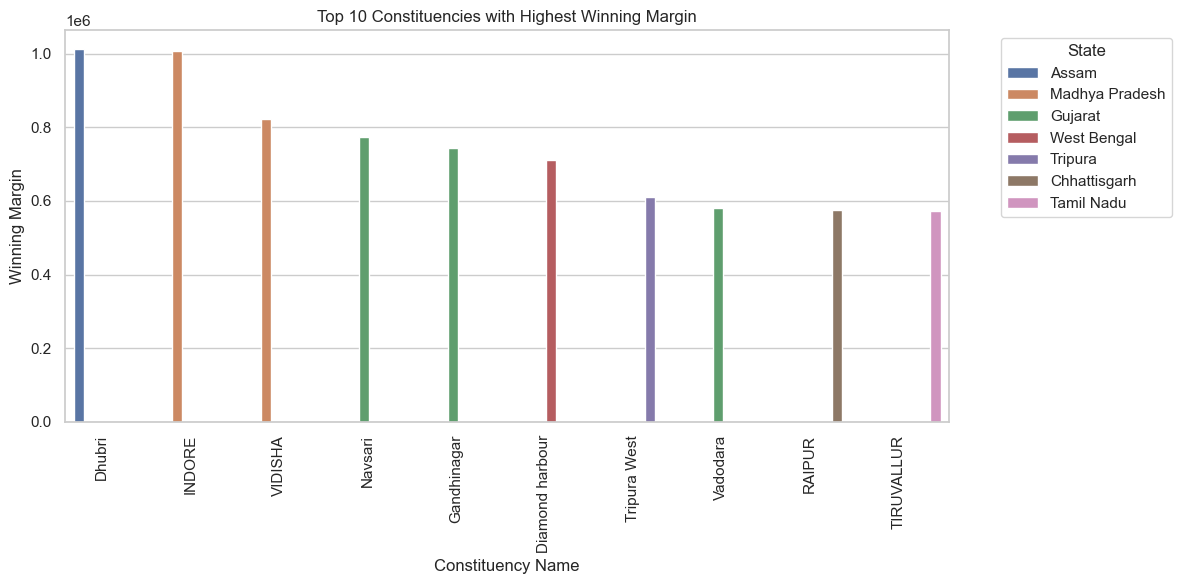

In [132]:
def calculate_winning_margin(group):
    sorted_group = group.sort_values('Total Votes', ascending=False)
    if len(sorted_group) >= 2:
        winner = sorted_group.iloc[0]
        runner_up = sorted_group.iloc[1]
        margin = winner['Total Votes'] - runner_up['Total Votes']
        return pd.Series({
            'Winner': winner['Candidate'],
            'Runner-up': runner_up['Candidate'],
            'Winning Margin': margin,
            'State': winner['State']
        })
    else:
        return pd.Series({
            'Winner': sorted_group.iloc[0]['Candidate'],
            'Runner-up': 'N/A',
            'Winning Margin': sorted_group.iloc[0]['Total Votes'],
            'State': sorted_group.iloc[0]['State']
        })


winning_margins = df.groupby('Constituency Name').apply(calculate_winning_margin).reset_index()
winning_margins = winning_margins.sort_values('Winning Margin', ascending=False)
print("Top 10 Constituencies with Highest Winning Margins:")
print(winning_margins.head(10))
top_10=winning_margins.head(10)
avg_margin_by_state = winning_margins.groupby('State')['Winning Margin'].mean()

plt.figure(figsize=(12, 6))
bars = sns.barplot(x='Constituency Name', y='Winning Margin', hue='State', data=top_10)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Constituencies with Highest Winning Margin')
plt.xlabel('Constituency Name')
plt.ylabel('Winning Margin')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Top 10 Candidate by voting percentage

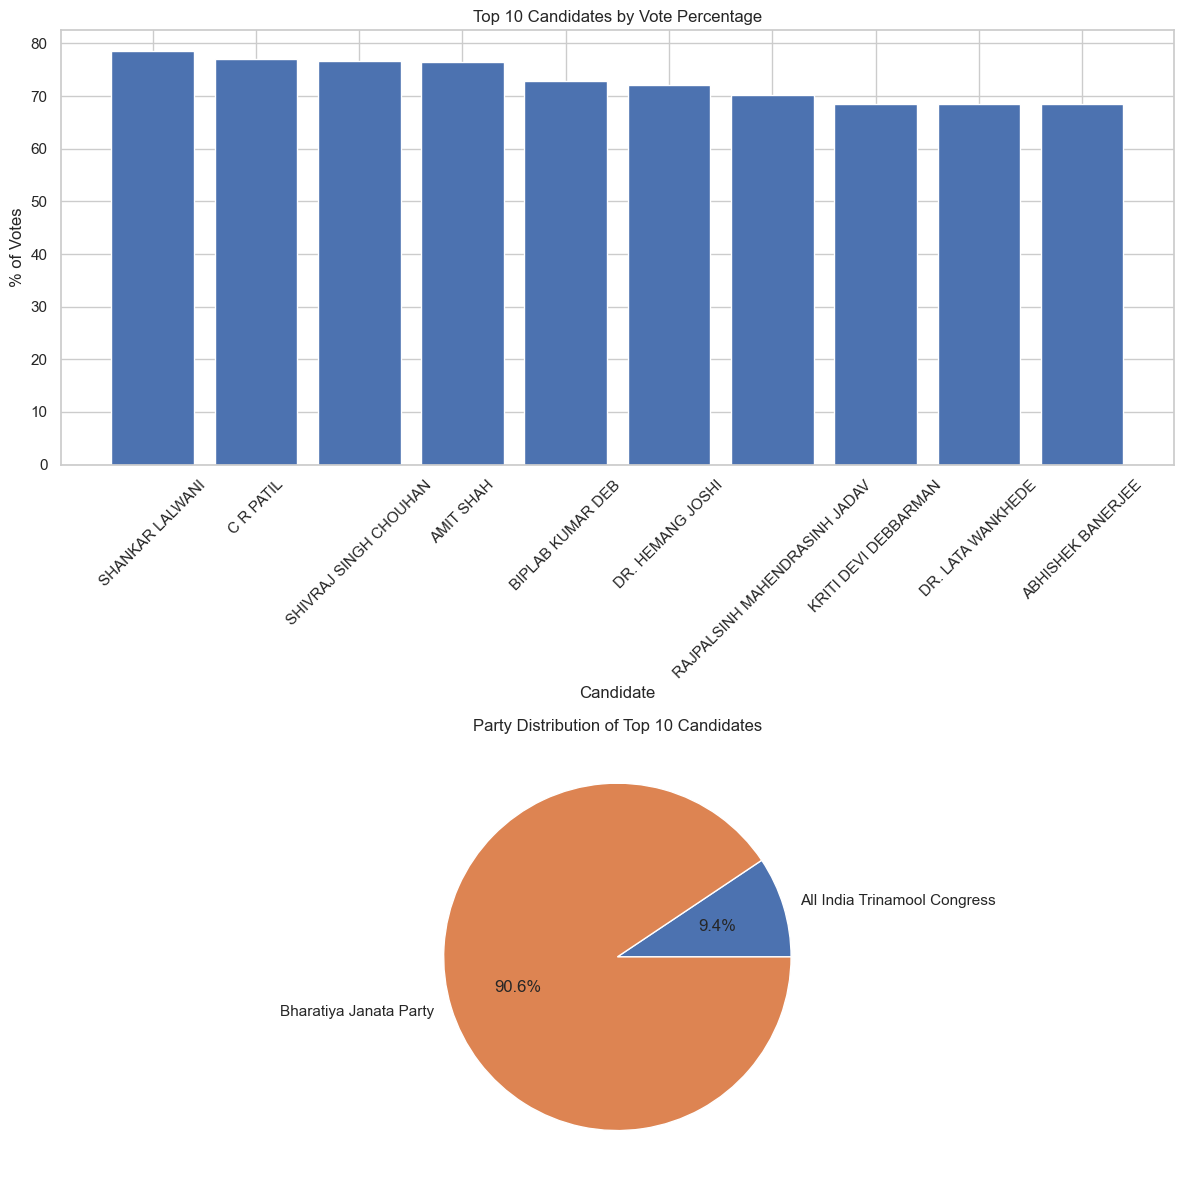

In [133]:
top_10 = df.sort_values('% of Votes', ascending=False).head(10)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
# Bar plot
ax1.bar(top_10['Candidate'], top_10['% of Votes'])
ax1.set_title('Top 10 Candidates by Vote Percentage')
ax1.set_xlabel('Candidate')
ax1.set_ylabel('% of Votes')
ax1.tick_params(axis='x', rotation=45)
# Pie chart
party_votes = top_10.groupby('Party')['% of Votes'].sum()
ax2.pie(party_votes, labels=party_votes.index, autopct='%1.1f%%')
ax2.set_title('Party Distribution of Top 10 Candidates')

plt.tight_layout()
plt.show()

In [151]:
def calculate_margin_and_names(group):
    sorted_group = group.sort_values('Total Votes', ascending=False)
    if len(sorted_group) > 1:
        margin = sorted_group.iloc[0]['Total Votes'] - sorted_group.iloc[1]['Total Votes']
        winner_name = sorted_group.iloc[0]['Candidate']
        runner_up_name = sorted_group.iloc[1]['Candidate']
        return pd.Series([margin, winner_name, runner_up_name], index=['Winning Margin', 'Winner', 'Runner-Up'])
    else:
        return pd.Series([pd.NA, pd.NA, pd.NA], index=['Winning Margin', 'Winner', 'Runner-Up']) 

margins_names = df.groupby('Constituency Name').apply(calculate_margin_and_names).reset_index()

close_contests = margins_names[margins_names['Winning Margin'] < 10000]

close_contests_sorted = close_contests.sort_values('Winning Margin')

print(close_contests_sorted)

     Constituency Name Winning Margin                     Winner  \
355  Mumbai North West             48   RAVINDRA DATTARAM WAIKAR   
40            Attingal            684          ADV ADOOR PRAKASH   
235             Jajpur           1587    RABINDRA NARAYAN BEHERA   
225       JAIPUR RURAL           1615         RAO RAJENDRA SINGH   
255             KANKER           1884                BHOJRAJ NAG   
124         Chandigarh           2504              MANISH TEWARI   
206           Hamirpur           2629        AJENDRA SINGH LODHI   
311        Lakshadweep           2647  MUHAMMED HAMDULLAH SAYEED   
174        Farrukhabad           2678              MUKESH RAJPUT   
73            Bansgaon           3150             KAMLESH PASWAN   
179           Firozpur           3242         SHER SINGH GHUBAYA   
458           Salempur           3573        RAMASHANKAR RAJBHAR   
157              Dhule           3831      BACHHAV SHOBHA DINESH   
409            Phulpur           4332           

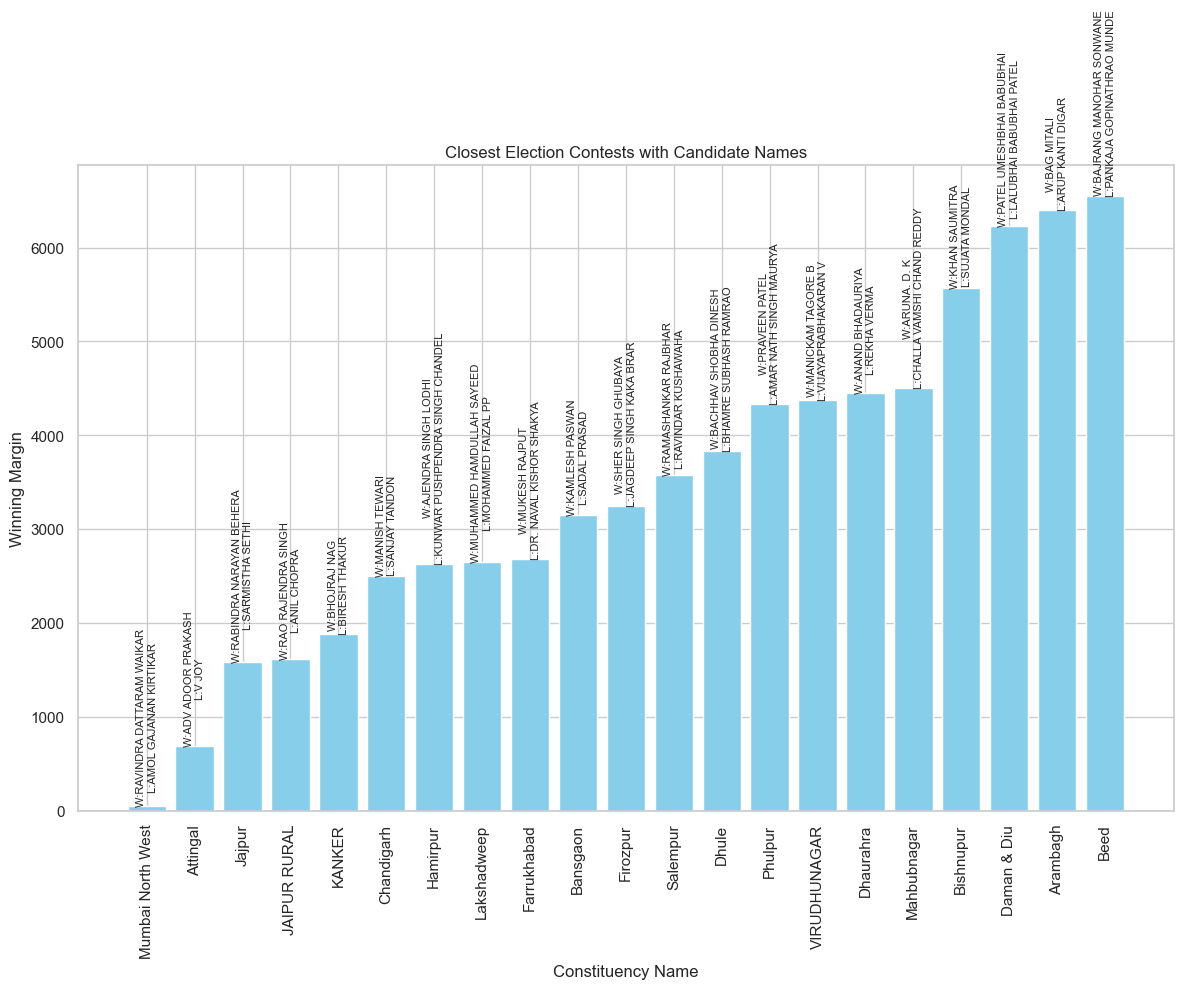

In [149]:
plt.figure(figsize=(12, 10))  
bars = plt.bar(close_contests_sorted['Constituency Name'], close_contests_sorted['Winning Margin'], color='skyblue')
plt.title('Closest Election Contests with Candidate Names')
plt.xlabel('Constituency Name')
plt.ylabel('Winning Margin')
plt.xticks(rotation=90)  
for bar, winner, runner_up in zip(bars, close_contests_sorted['Winner'], close_contests_sorted['Runner-Up']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'W:{winner}\nL:{runner_up}', ha='center', va='bottom', fontsize=8, rotation=90)
plt.tight_layout()
plt.show()

In [157]:
top_5_parties = df.nlargest(5, 'Total Votes')

In [158]:
top_5_parties

,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency Name,Constituency code
5500,RAKIBUL HUSSAIN,Indian National Congress,1468549,3336,1471885,59.99,Assam,Dhubri,2
1327,SHANKAR LALWANI,Bharatiya Janata Party,1223746,3005,1226751,78.54,Madhya Pradesh,INDORE,26
1253,SHIVRAJ SINGH CHOUHAN,Bharatiya Janata Party,1111556,4904,1116460,76.70,Madhya Pradesh,VIDISHA,18
2737,DR C N MANJUNATH,Bharatiya Janata Party,1075553,3449,1079002,56.21,Karnataka,Bangalore Rural,23
5183,BRIJMOHAN AGRAWAL,Bharatiya Janata Party,1047447,2904,1050351,66.19,Chhattisgarh,RAIPUR,8


In [159]:
df2=pd.read_csv('outputparty.csv')

In [160]:
df2.head()

,Party,Won,Leading,Total,Total.1,543,0,543.1
0,Bharatiya Janata Party - BJP,240,0,240,NaN,NaN,NaN,NaN
1,Indian National Congress - INC,99,0,99,NaN,NaN,NaN,NaN
2,Samajwadi Party - SP,37,0,37,NaN,NaN,NaN,NaN
3,All India Trinamool Congress - AITC,29,0,29,NaN,NaN,NaN,NaN
4,Dravida Munnetra Kazhagam - DMK,22,0,22,NaN,NaN,NaN,NaN


In [166]:
df2 = df2.iloc[:, :-6]
df2.to_csv(file_path, index=False)

In [167]:
df2.head()

,Party,Won
0,Bharatiya Janata Party - BJP,240
1,Indian National Congress - INC,99
2,Samajwadi Party - SP,37
3,All India Trinamool Congress - AITC,29
4,Dravida Munnetra Kazhagam - DMK,22


In [168]:
top_5_parties = df2.nlargest(5, 'Won')

In [169]:
top_5_parties

,Party,Won
0,Bharatiya Janata Party - BJP,240
1,Indian National Congress - INC,99
2,Samajwadi Party - SP,37
3,All India Trinamool Congress - AITC,29
4,Dravida Munnetra Kazhagam - DMK,22


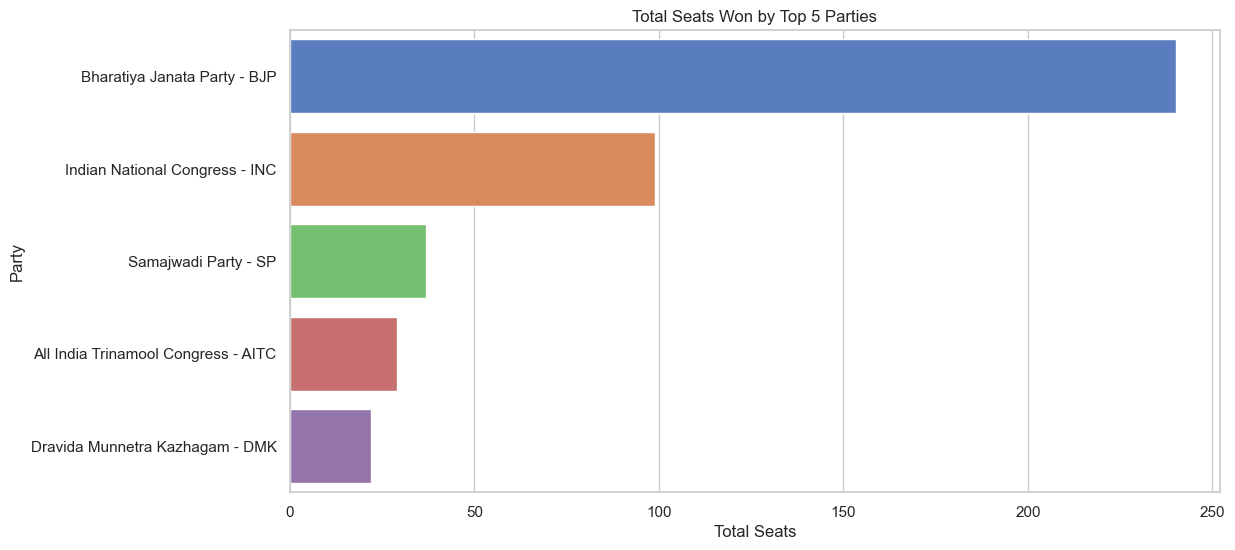

In [171]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_parties, x='Won', y='Party', palette='muted')
plt.title('Total Seats Won by Top 5 Parties')
plt.xlabel('Total Seats')
plt.ylabel('Party')
plt.show()

In [178]:
df3=pd.read_csv('combined_data.csv')

,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency Name,Constituency code
0,KIREN RIJIJU,Bharatiya Janata Party,196415,9002,205417,51.38,Arunachal Pradesh,Arunachal West,1
1,NABAM TUKI,Indian National Congress,100100,4579,104679,26.18,Arunachal Pradesh,Arunachal West,1
2,TECHI RANA,Independent,31106,2208,33314,8.33,Arunachal Pradesh,Arunachal West,1
3,TOKO SHEETAL,Gana Suraksha Party,27670,2860,30530,7.64,Arunachal Pradesh,Arunachal West,1
4,BIMPAK SIGA,Independent,10569,949,11518,2.88,Arunachal Pradesh,Arunachal West,1


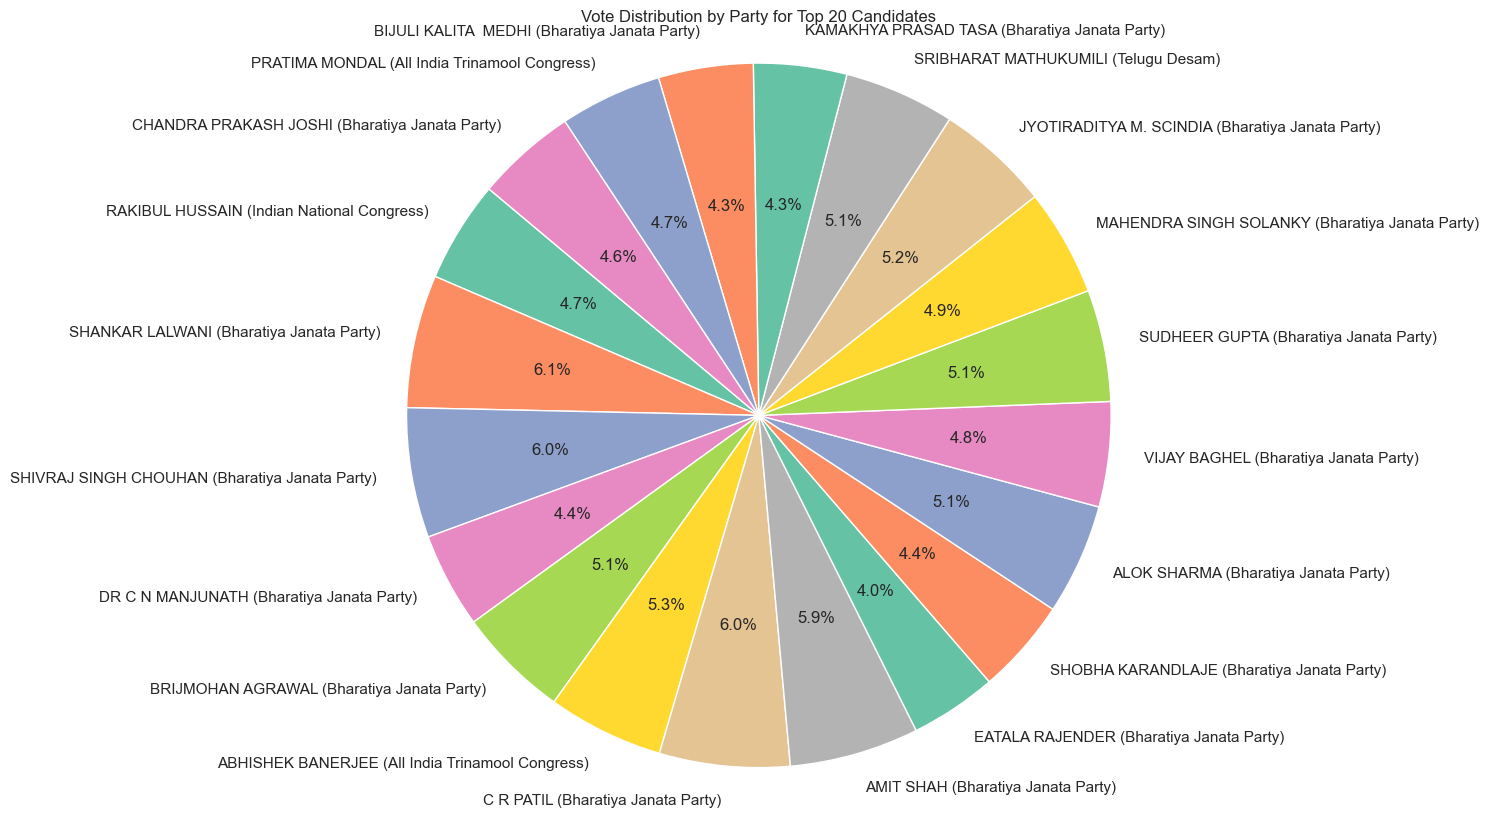

In [180]:
# Sort by Total Votes and select the top 20 candidates
top_candidates = df3.nlargest(20, 'Total Votes')

# Data preparation for vote distribution by party
candidates = top_candidates['Candidate'] + ' (' + top_candidates['Party'] + ')'
percent_votes = top_candidates['% of Votes']

# Plotting
plt.figure(figsize=(10, 10))
plt.pie(percent_votes, labels=candidates, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Vote Distribution by Party for Top 20 Candidates')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()